# Experiment 10 - 2 zeroshot learning evaluation

In [3]:
import numpy as np
import torch
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from model import analysis
from importlib import reload
import tools
import pandas as pd
analysis = reload(analysis)
sns.set_style("whitegrid")

In [4]:
datadir = '../../data/model_results/experiment10/'
palette = sns.color_palette("Set2")


# Load data

In [5]:
simstart = 0 
simend = 20

df_adam0 = pd.read_csv(datadir + 'expt10_adam_zeroshot_2layers_2rulepretraining_simData' + str(simstart) + '.csv')
df_adam0.insert(len(df_adam0.columns),"Simulation",list(np.repeat(simstart,len(df_adam0))),True)
df_adam0.insert(len(df_adam0.columns),"Layers",list(np.repeat(2,len(df_adam0))),True)
df_adam0.insert(len(df_adam0.columns),"Training",list(np.repeat('Simple task pretraining',len(df_adam0))),True)
#
df_adam0_1rule = pd.read_csv(datadir + 'expt10_adam_zeroshot_2layers_pretraining_simData' + str(simstart) + '.csv')
df_adam0_1rule.insert(len(df_adam0_1rule.columns),"Simulation",list(np.repeat(simstart,len(df_adam0_1rule))),True)
df_adam0_1rule.insert(len(df_adam0_1rule.columns),"Layers",list(np.repeat(2,len(df_adam0_1rule))),True)
df_adam0_1rule.insert(len(df_adam0_1rule.columns),"Training",list(np.repeat('Concept pretraining',len(df_adam0_1rule))),True)
#
df_adam0_nopretraining = pd.read_csv(datadir + 'expt10_adam_zeroshot_2layers_simData' + str(simstart) + '.csv')
df_adam0_nopretraining.insert(len(df_adam0_nopretraining.columns),"Simulation",list(np.repeat(simstart,len(df_adam0_nopretraining))),True)
df_adam0_nopretraining.insert(len(df_adam0_nopretraining.columns),"Layers",list(np.repeat(2,len(df_adam0_nopretraining))),True)
df_adam0_nopretraining.insert(len(df_adam0_nopretraining.columns),"Training",list(np.repeat('Vanilla',len(df_adam0_nopretraining))),True)
#
df_adam0_combined = pd.read_csv(datadir + 'expt10_adam_zeroshot_2layers_pretraining_2rulepretraining_simData' + str(simstart) + '.csv')
df_adam0_combined.insert(len(df_adam0_combined.columns),"Simulation",list(np.repeat(simstart,len(df_adam0_combined))),True)
df_adam0_combined.insert(len(df_adam0_combined.columns),"Layers",list(np.repeat(2,len(df_adam0_combined))),True)
df_adam0_combined.insert(len(df_adam0_combined.columns),"Training",list(np.repeat('Combined',len(df_adam0_combined))),True)

for i in range(simstart+1,simend):
    ####
    # 2 layers
    #
    tmp = pd.read_csv(datadir + 'expt10_adam_zeroshot_2layers_2rulepretraining_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Layers",list(np.repeat(2,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Training",list(np.repeat('Simple task pretraining',len(tmp))),True)
    tmp['LogicAvg'] = tmp[['LogicPS1', 'LogicPS2']].mean(axis=1)
    tmp['SensoryAvg'] = tmp[['SensoryPS1', 'SensoryPS2']].mean(axis=1)
    tmp['MotorAvg'] = tmp[['MotorPS1', 'MotorPS2']].mean(axis=1)
    tmp['PSavg'] = tmp[['LogicAvg', 'SensoryAvg','MotorAvg']].mean(axis=1)
    df_adam0 = df_adam0.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt10_adam_zeroshot_2layers_pretraining_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Layers",list(np.repeat(2,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Training",list(np.repeat('Concept pretraining',len(tmp))),True)
    tmp['LogicAvg'] = tmp[['LogicPS1', 'LogicPS2']].mean(axis=1)
    tmp['SensoryAvg'] = tmp[['SensoryPS1', 'SensoryPS2']].mean(axis=1)
    tmp['MotorAvg'] = tmp[['MotorPS1', 'MotorPS2']].mean(axis=1)
    tmp['PSavg'] = tmp[['LogicAvg', 'SensoryAvg','MotorAvg']].mean(axis=1)
    df_adam0_1rule = df_adam0_1rule.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt10_adam_zeroshot_2layers_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Layers",list(np.repeat(2,len(tmp))),True)    
    tmp.insert(len(tmp.columns),"Training",list(np.repeat('Vanilla',len(tmp))),True)
    tmp['LogicAvg'] = tmp[['LogicPS1', 'LogicPS2']].mean(axis=1)
    tmp['SensoryAvg'] = tmp[['SensoryPS1', 'SensoryPS2']].mean(axis=1)
    tmp['MotorAvg'] = tmp[['MotorPS1', 'MotorPS2']].mean(axis=1)
    tmp['PSavg'] = tmp[['LogicAvg', 'SensoryAvg','MotorAvg']].mean(axis=1)
    df_adam0_nopretraining = df_adam0_nopretraining.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt10_adam_zeroshot_2layers_pretraining_2rulepretraining_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Layers",list(np.repeat(2,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Training",list(np.repeat('Combined',len(tmp))),True)
    tmp['LogicAvg'] = tmp[['LogicPS1', 'LogicPS2']].mean(axis=1)
    tmp['SensoryAvg'] = tmp[['SensoryPS1', 'SensoryPS2']].mean(axis=1)
    tmp['MotorAvg'] = tmp[['MotorPS1', 'MotorPS2']].mean(axis=1)
    tmp['PSavg'] = tmp[['LogicAvg', 'SensoryAvg','MotorAvg']].mean(axis=1)
    df_adam0_combined = df_adam0_combined.append(tmp)
    
    
df_adam0.Accuracy = df_adam0.Accuracy.values*100.0
df_adam0_1rule.Accuracy = df_adam0_1rule.Accuracy.values*100.0
df_adam0_nopretraining.Accuracy = df_adam0_nopretraining.Accuracy.values*100.0
df_adam0_combined.Accuracy = df_adam0_combined.Accuracy.values*100.0
df_all = pd.concat([df_adam0_nopretraining,df_adam0_1rule,df_adam0,df_adam0_combined])

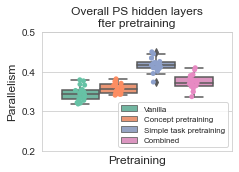

In [6]:
plt.figure(figsize=(3.5,2.5))
ax = sns.boxplot(x="NumPracticedTasks",y="PSavg",hue='Training',palette='Set2',data=df_all)
sns.stripplot(x="NumPracticedTasks",y="PSavg",hue='Training',palette='Set2',dodge=True,data=df_all)
plt.title('Overall PS hidden layers\nfter pretraining', fontsize=12)
plt.xlabel('Pretraining', fontsize=12)
plt.ylabel('Parallelism', fontsize=12)
plt.xticks([],fontsize=10);
plt.yticks(fontsize=10);
plt.ylim([0.2,.5])
handles, labels = ax.get_legend_handles_labels()
# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:4], labels[0:4],fontsize=8)
# When creating the legend, only use the first two elements
# to effectively remove the last two.
# l = plt.legend(handles[0:4], labels[0:4],fontsize=8)
# plt.ylim([0,.5])


plt.tight_layout()
# plt.savefig('Expt10_ModelPS_Average_ZeroShot.png', dpi=300)

/Users/tito/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 35.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tito/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


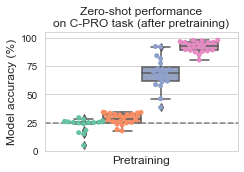

In [7]:
plt.figure(figsize=(3.5,2.5))
sns.boxplot(x="NumPracticedTasks",y="Accuracy",hue='Training',palette='Set2',data=df_all)
ax = sns.swarmplot(x="NumPracticedTasks",y="Accuracy",hue='Training',palette='Set2',data=df_all,dodge=True)
plt.plot(np.arange(-0.5,2.5),np.repeat(25.0,3),'gray',linestyle='--',label='Chance')
plt.title('Zero-shot performance\non C-PRO task (after pretraining)', fontsize=12)
plt.xlabel('Pretraining', fontsize=12)
plt.ylabel('Model accuracy (%)', fontsize=12)
plt.xticks([],fontsize=10);
plt.yticks(fontsize=10);
plt.legend().remove()
plt.ylim([0,105])
plt.tight_layout()
# plt.savefig('Expt10_ModelPerformance_ZeroShot.png', dpi=300)

## Plot PS as a function of depth for 'combined' pretraining

#### First load in vanilla model with CPRO task training (from expt 8)

In [8]:
df_vanilla_cprotrained = pd.DataFrame()
for i in range(simstart,simend):
    tmp = pd.read_csv(datadir + '../experiment8/expt8_adam_90accCutOff_2layers_practice_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Training",list(np.repeat('Vanilla',len(tmp))),True)
    df_vanilla_cprotrained = df_vanilla_cprotrained.append(tmp)

Vanilla network statistical testing
	 Sensory Depth 1 vs. 2 | t = 6.029806145499495 | p = 5.181248540561228e-07
	 Logic Depth 1 vs. 2 | t = 5.671874033614754 | p = 1.605097223580256e-06
	 Motor Depth 1 vs. 2 | t = 4.798104468537346 | p = 2.489438509554565e-05
Combined network statistical testing
	 Sensory Depth 1 vs. 2 | t = 44.32987919718413 | p = 2.4918484126126487e-34
	 Logic Depth 1 vs. 2 | t = -5.759767759885492 | p = 1.2160089309212503e-06
	 Motor Depth 1 vs. 2 | t = -3.8364086550949272 | p = 0.0004573539284536118
Trained vanilla network statistical testing
	 Sensory Depth 1 vs. 2 | t = 42.66804624131267 | p = 1.0350811614912636e-33
	 Logic Depth 1 vs. 2 | t = 2.2083897193332054 | p = 0.03332316381347526
	 Motor Depth 1 vs. 2 | t = -10.666103751488489 | p = 5.518237756285886e-13


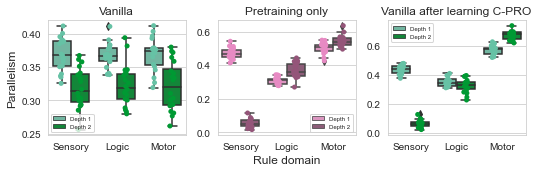

In [9]:
vanilla_palette = [sns.color_palette("Set2")[0],'#009933']
pretrained_palette = [sns.color_palette("Set2")[3],'#945579']
depth_palette = ['#0099cc','#336699']


df_ps_combined = {}
df_ps_combined['Depth'] = []
df_ps_combined['DepthCount'] = []
df_ps_combined['Parallelism'] = []
df_ps_combined['Domain'] = []
df_ps_combined['Simulation'] = []

df_ps_vanilla = {}
df_ps_vanilla['Depth'] = []
df_ps_vanilla['DepthCount'] = []
df_ps_vanilla['Parallelism'] = []
df_ps_vanilla['Domain'] = []
df_ps_vanilla['Simulation'] = []

df_ps_vanilla_trained = {}
df_ps_vanilla_trained['Depth'] = []
df_ps_vanilla_trained['DepthCount'] = []
df_ps_vanilla_trained['Parallelism'] = []
df_ps_vanilla_trained['Domain'] = []
df_ps_vanilla_trained['Simulation'] = []

for i in range(simstart,simend):
    # Concept pretraining
    tmpdf = df_adam0_combined.loc[df_adam0_combined.Simulation==i]
    tmpdf = tmpdf.loc[tmpdf.NumPracticedTasks==0]
    for depth in range(1,3):
        for rule in ['Sensory','Logic','Motor']:
            df_ps_combined['Simulation'].append(i)
            df_ps_combined['Depth'].append('Depth ' + str(depth))
            df_ps_combined['DepthCount'].append(depth)
            df_ps_combined['Domain'].append(rule)
            df_ps_combined['Parallelism'].append(tmpdf[rule + 'PS' + str(depth)].values[0])

    # Vanilla 
    tmpdf = df_adam0_nopretraining.loc[df_adam0_nopretraining.Simulation==i]
    tmpdf = tmpdf.loc[tmpdf.NumPracticedTasks==0]
    for depth in range(1,3):
        for rule in ['Sensory','Logic','Motor']:
            df_ps_vanilla['Simulation'].append(i)
            df_ps_vanilla['Depth'].append('Depth ' + str(depth))
            df_ps_vanilla['DepthCount'].append(depth)
            df_ps_vanilla['Domain'].append(rule)
            df_ps_vanilla['Parallelism'].append(tmpdf[rule + 'PS' + str(depth)].values[0])
            
    # Vanilla -- CPRO trained
    tmpdf = df_vanilla_cprotrained.loc[df_vanilla_cprotrained.Simulation==i]
    tmpdf = tmpdf.loc[tmpdf.NumPracticedTasks==60]
    for depth in range(1,3):
        for rule in ['Sensory','Logic','Motor']:
            df_ps_vanilla_trained['Simulation'].append(i)
            df_ps_vanilla_trained['Depth'].append('Depth ' + str(depth))
            df_ps_vanilla_trained['DepthCount'].append(depth)
            df_ps_vanilla_trained['Domain'].append(rule)
            df_ps_vanilla_trained['Parallelism'].append(tmpdf[rule + 'PS' + str(depth)].values[0])



df_ps_combined = pd.DataFrame(df_ps_combined)
df_ps_vanilla = pd.DataFrame(df_ps_vanilla)
df_ps_vanilla_trained = pd.DataFrame(df_ps_vanilla_trained)

plt.figure(figsize=(7.5,2.5))

plt.subplot(131)
ax = sns.boxplot(x="Domain",y="Parallelism",hue="Depth",palette=vanilla_palette,data=df_ps_vanilla)
sns.stripplot(x="Domain",y="Parallelism",hue="Depth",palette=vanilla_palette,dodge=True,data=df_ps_vanilla)
plt.title('Vanilla', fontsize=12)
plt.xlabel(None,fontsize=12)
plt.ylabel('Parallelism', fontsize=12)
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);
plt.legend()
handles, labels = ax.get_legend_handles_labels()
# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2],fontsize=6)
# plt.ylim([0,.5])

plt.subplot(132)
ax = sns.boxplot(x="Domain",y="Parallelism",hue="Depth",palette=pretrained_palette,data=df_ps_combined)
sns.stripplot(x="Domain",y="Parallelism",hue="Depth",palette=pretrained_palette,dodge=True,data=df_ps_combined)
plt.title('Pretraining only', fontsize=12)
plt.xlabel('Rule domain',fontsize=12)
plt.ylabel(None, fontsize=12)
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);
plt.legend()
handles, labels = ax.get_legend_handles_labels()
# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2],fontsize=6)
# plt.ylim([0,.5])

plt.subplot(133)
ax = sns.boxplot(x="Domain",y="Parallelism",hue="Depth",palette=vanilla_palette,data=df_ps_vanilla_trained)
sns.stripplot(x="Domain",y="Parallelism",hue="Depth",palette=vanilla_palette,dodge=True,data=df_ps_vanilla_trained)
plt.title('Vanilla after learning C-PRO', fontsize=12)
plt.xlabel(None,fontsize=12)
plt.ylabel(None, fontsize=12)
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);
plt.legend()
handles, labels = ax.get_legend_handles_labels()
# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2],fontsize=6)
# plt.ylim([0,.5])
plt.tight_layout()
# plt.savefig('Expt10_PSbyDepth.png',dpi=300)


print('Vanilla network statistical testing')
for domain in ['Sensory','Logic','Motor']:
    tmp = df_ps_vanilla.loc[df_ps_vanilla.Domain==domain]
    t, p = stats.ttest_ind(tmp.Parallelism[tmp.Depth=='Depth 1'],tmp.Parallelism[tmp.Depth=='Depth 2'])
    print('\t', domain, 'Depth 1 vs. 2 | t =', t, '| p =', p)

print('Combined network statistical testing')
for domain in ['Sensory','Logic','Motor']:
    tmp = df_ps_combined.loc[df_ps_combined.Domain==domain]
    t, p = stats.ttest_ind(tmp.Parallelism[tmp.Depth=='Depth 1'],tmp.Parallelism[tmp.Depth=='Depth 2'])
    print('\t', domain, 'Depth 1 vs. 2 | t =', t, '| p =', p)
    
print('Trained vanilla network statistical testing')
for domain in ['Sensory','Logic','Motor']:
    tmp = df_ps_vanilla_trained.loc[df_ps_vanilla_trained.Domain==domain]
    t, p = stats.ttest_ind(tmp.Parallelism[tmp.Depth=='Depth 1'],tmp.Parallelism[tmp.Depth=='Depth 2'])
    print('\t', domain, 'Depth 1 vs. 2 | t =', t, '| p =', p)
    

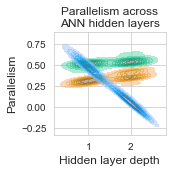

In [13]:
# df_normalized = pd.DataFrame()
# # df_normalized = df_ps_combined.copy()

# # Normalize all PS and decoding scores for each domain
# for domain in ['Sensory','Logic','Motor']:
#     tmpdf = df_ps_combined.loc[df_ps_combined.Domain==domain].copy()
#     tmpps = (tmpdf.Parallelism.values - tmpdf.Parallelism.min())/np.max(tmpdf.Parallelism.max())
#     tmpdf['Parallelism'] = tmpps
#     df_normalized = df_normalized.append(tmpdf)

tmp = sns.color_palette('colorblind')
palette = [tmp[2],tmp[1],tmp[0]]

plt.figure(figsize=(2.5,2.5))
ax = sns.kdeplot(x="DepthCount",y="Parallelism",hue="Domain",hue_order=['Motor','Logic','Sensory'],data=df_ps_combined,palette=palette,alpha=0.5,legend=False,shade=True)
plt.title('Parallelism across\nANN hidden layers',fontsize=12)
# plt.xticks([-5,1],['Input','Output'],fontsize=10,rotation=10)
plt.xticks(fontsize=10)
plt.xlabel('Hidden layer depth', fontsize=12)
plt.ylabel('Parallelism',fontsize=12)
plt.yticks(fontsize=10)
# ax.legend_.set_bbox_to_anchor((0, .4))
# ax.legend_._set_loc(2)
# plt.setp(ax.get_legend().get_title(), fontsize='0')
# plt.setp(ax.get_legend().get_texts(), fontsize='8')
plt.tight_layout()
# plt.savefig('ANNPSGradient.png',dpi=300)
